In [1]:
from tensorflow.keras.layers import Dense,Input,Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix

2025-05-22 09:53:19.607751: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-22 09:53:19.912432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-22 09:53:20.010259: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-22 09:53:20.038323: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-22 09:53:20.233850: I tensorflow/core/platform/cpu_feature_guar

In [7]:
df=pd.read_csv('HousingData Exam 1.csv')
df

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
df.isnull().sum()

CRIM       20
INDUS      20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

<Axes: >

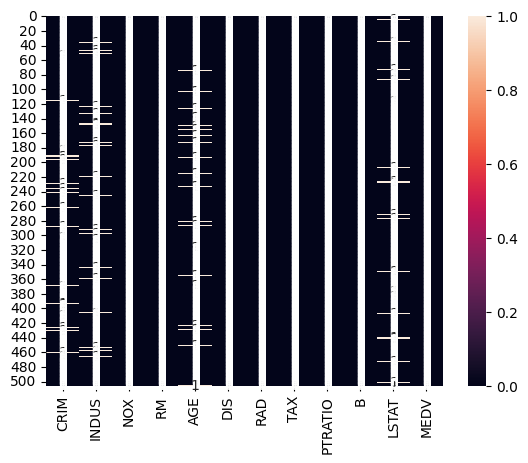

In [10]:
sns.heatmap(df.isnull(),annot=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   INDUS    486 non-null    float64
 2   NOX      506 non-null    float64
 3   RM       506 non-null    float64
 4   AGE      486 non-null    float64
 5   DIS      506 non-null    float64
 6   RAD      506 non-null    int64  
 7   TAX      506 non-null    int64  
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    486 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


In [12]:
for col in df:
    if df[col].isnull().any() == True:
        df.replace(np.nan,np.mean(df[col]),inplace=True)

In [13]:
df.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
df

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,7.07,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,7.07,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,2.18,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,2.18,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,3.611874,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,3.611874,22.4
502,0.04527,11.93,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,11.93,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,11.93,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [15]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [16]:
x

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,7.07,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,7.07,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,2.18,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,2.18,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,3.611874
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,3.611874
502,0.04527,11.93,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,11.93,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,11.93,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [17]:
x.shape

(506, 11)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 463.2952 - val_loss: 379.2343
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 310.8606 - val_loss: 254.7095
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 201.4060 - val_loss: 187.5112
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 147.3588 - val_loss: 143.8031
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 126.4394 - val_loss: 116.6242
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.2888 - val_loss: 100.7213
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.9386 - val_loss: 89.9950
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.5098 - val_loss: 84.7686
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.7601 - val_loss: 81.9747
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.2640 - val_loss: 79.7109


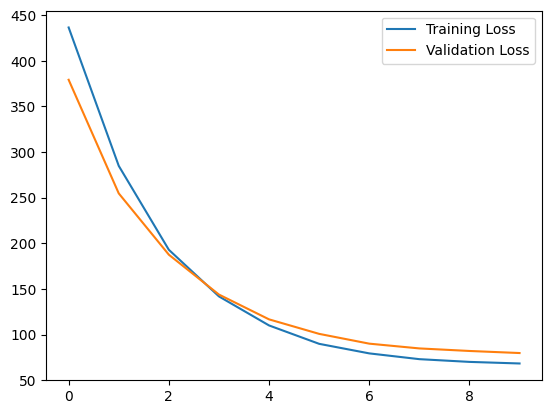

1 10 tanh
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 63.9880
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 508.1237 - val_loss: 391.1985
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 337.0697 - val_loss: 254.5753
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 197.5151 - val_loss: 177.6639
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127.7974 - val_loss: 134.2850
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 125.0994 - val_loss: 109.4043
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86.0748 - val_loss: 96.2645
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.0201 - val_loss: 88.4856
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.8623 - val_loss: 83.8371
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.5735 - val_loss: 81.1253
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.6376 - val_loss: 79.8809
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67.67

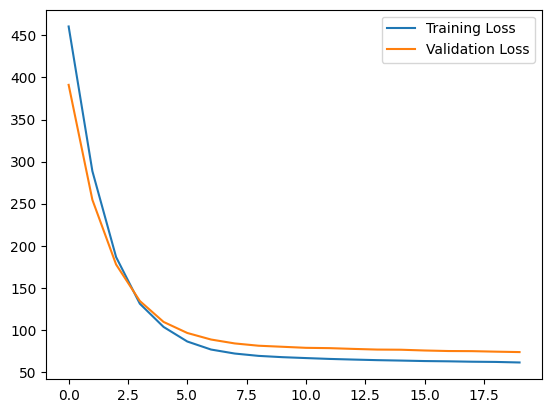

1 20 tanh
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 61.6497
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 534.9897 - val_loss: 436.5960
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 360.2096 - val_loss: 300.3618
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 220.5011 - val_loss: 216.1583
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 155.7246 - val_loss: 163.6760
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 127.5937 - val_loss: 129.2743
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.3274 - val_loss: 107.5894
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88.2275 - val_loss: 96.2962
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.2827 - val_loss: 88.6280
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.7200 - val_loss: 84.1172
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.6174 - val_loss: 82.4170
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.

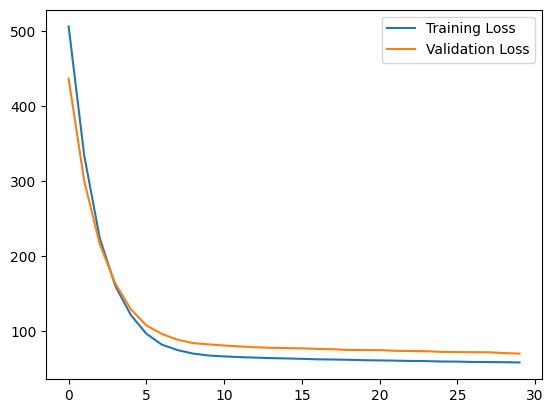

1 30 tanh
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 60.8856
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1841.0028 - val_loss: 425.6705
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 264.4460 - val_loss: 213.6468
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116.2861 - val_loss: 99.4922
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81.4127 - val_loss: 77.0033
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72.8551 - val_loss: 74.2153
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.7035 - val_loss: 70.8966
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.8703 - val_loss: 68.0437
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55.6989 - val_loss: 60.6385
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.6181 - val_loss: 57.4129
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49.5486 - val_loss: 54.9840


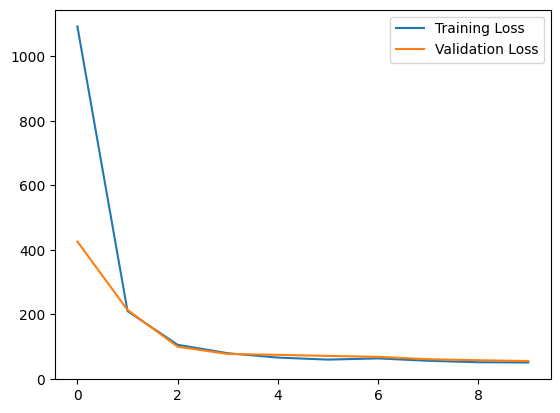

1 10 relu
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 57.7411
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 190.2707 - val_loss: 135.4219
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.7770 - val_loss: 97.5667
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.4491 - val_loss: 72.4408
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 67.7348 - val_loss: 65.4473
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.6321 - val_loss: 65.5374
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.3938 - val_loss: 59.0626
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.0854 - val_loss: 59.2141
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49.4403 - val_loss: 57.8790
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.8578 - val_loss: 53.9137
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.2437 - val_loss: 50.9931
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.7941 - val

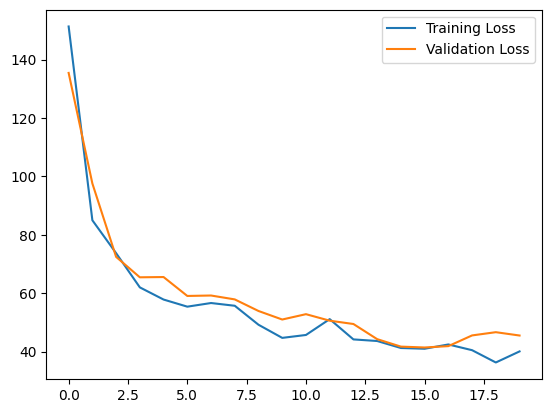

1 20 relu
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 54.5307
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 852.4310 - val_loss: 141.4173
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 128.0526 - val_loss: 169.6954
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 106.9676 - val_loss: 89.3367
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.6632 - val_loss: 85.7950
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.9095 - val_loss: 76.7966
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.6415 - val_loss: 75.2262
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.9253 - val_loss: 72.4095
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.4693 - val_loss: 67.4218
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.0498 - val_loss: 64.4751
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.5574 - val_loss: 62.2870
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.9153 - 

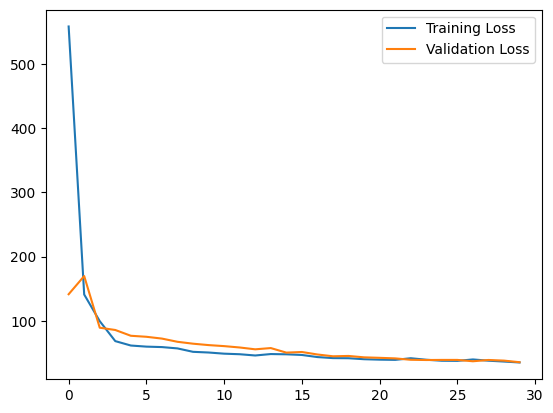

1 30 relu
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 41.5577
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 392.0628 - val_loss: 172.4286
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 139.9535 - val_loss: 137.1624
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 113.8186 - val_loss: 121.8978
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.5711 - val_loss: 110.4998
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94.8592 - val_loss: 102.0914
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.4194 - val_loss: 96.0447
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81.9413 - val_loss: 91.0766
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.0086 - val_loss: 87.6001
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71.7014 - val_loss: 85.9736
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.2099 - val_loss: 84.0179


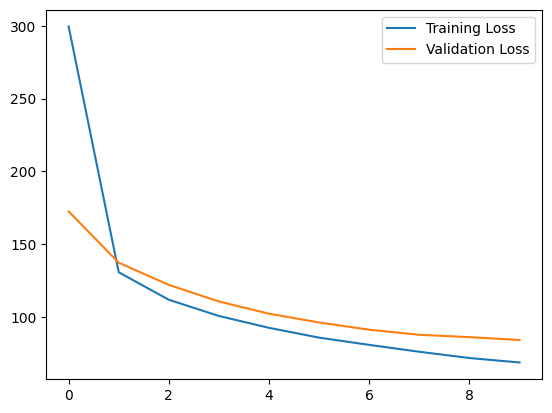

2 10 tanh
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 65.5401
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 415.0191 - val_loss: 191.4184
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 161.8260 - val_loss: 149.0299
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 130.7529 - val_loss: 131.1046
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 109.2599 - val_loss: 117.5446
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 101.7225 - val_loss: 107.3916
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.9419 - val_loss: 99.6408
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87.9516 - val_loss: 93.9272
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.9753 - val_loss: 90.6255
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81.8459 - val_loss: 87.0204
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.3117 - val_loss: 84.7803
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.46

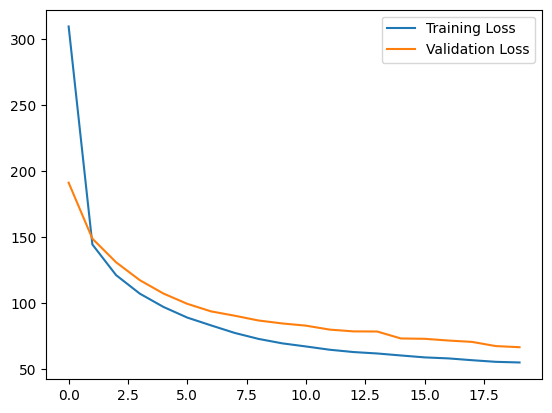

2 20 tanh
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 60.2476
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 428.6790 - val_loss: 200.5464
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 147.6347 - val_loss: 160.3349
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 140.8532 - val_loss: 139.5478
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 120.2362 - val_loss: 124.1961
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94.7253 - val_loss: 113.1306
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.9612 - val_loss: 104.1023
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.4297 - val_loss: 97.2995
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.7217 - val_loss: 92.6614
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.7332 - val_loss: 88.8998
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.9554 - val_loss: 86.6552
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70.83

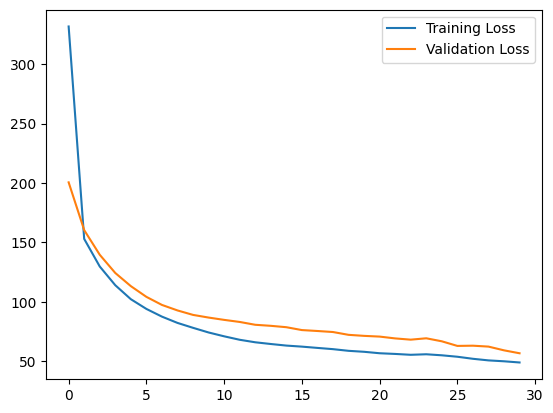

2 30 tanh
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 52.0016
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 549.2148 - val_loss: 118.8637
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 137.7895 - val_loss: 78.7957
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.5156 - val_loss: 68.8694
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.5941 - val_loss: 72.6443
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.9160 - val_loss: 110.5222
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.7419 - val_loss: 69.5104
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.1743 - val_loss: 74.6722
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.3083 - val_loss: 69.4410
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.2523 - val_loss: 56.6284
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.0925 - val_loss: 81.1007


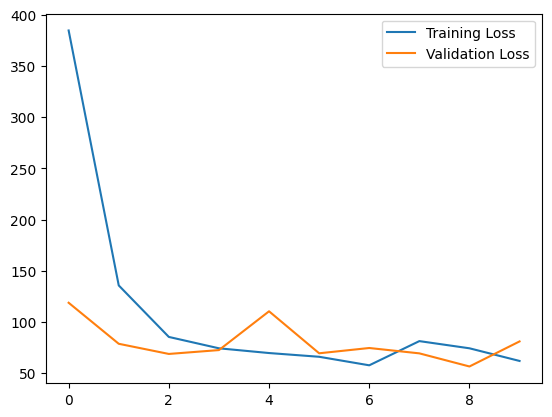

2 10 relu
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 83.7529
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 792.6859 - val_loss: 226.4309
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 177.3659 - val_loss: 128.7861
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 105.8038 - val_loss: 84.8069
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.7610 - val_loss: 88.9793
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.9092 - val_loss: 73.4069
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.3478 - val_loss: 70.3255
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.6471 - val_loss: 69.3508
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.5537 - val_loss: 67.0558
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.7751 - val_loss: 66.5214
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.5301 - val_loss: 62.6358
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.9520 - 

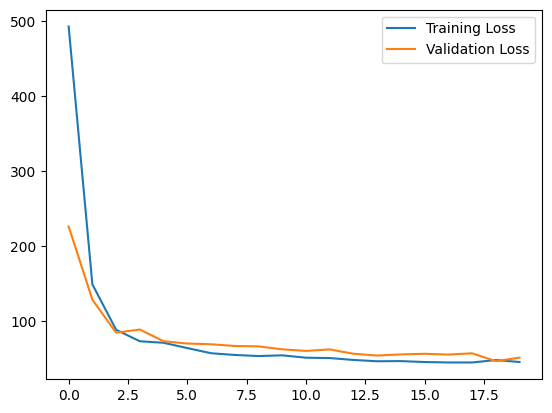

2 20 relu
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 47.2844
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 877.7550 - val_loss: 303.3860
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 226.9320 - val_loss: 102.0339
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 106.0668 - val_loss: 76.1909
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.4189 - val_loss: 67.3636
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.3894 - val_loss: 66.3117
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.2799 - val_loss: 62.8322
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 58.4170 - val_loss: 66.8710
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.5149 - val_loss: 61.7203
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.6592 - val_loss: 64.5052
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.6689 - val_loss: 57.7590
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.5672 - 

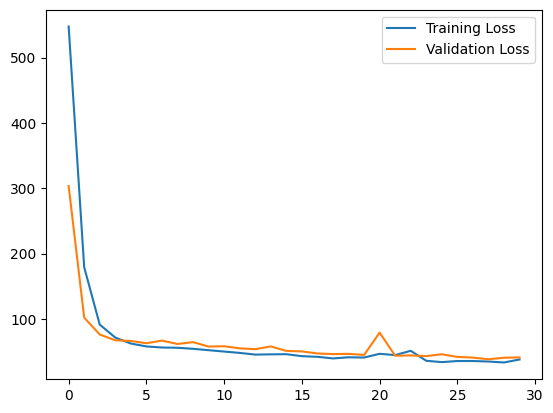

2 30 relu
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 45.3881


In [28]:
layers=[1,2]
epochs=[10,20,30]
activations=['tanh','relu']
rslt=[]
losses=[]
for layer in layers:
    for activation in activations:
        for epoch in epochs:
            model=Sequential(
                [Input(shape=(11,)),
                Dense(256,activation=activation)]
                
            )
            if layer ==2:
                model.add(Dense(128,activation=activation))
                model.add(Dense(1))
            else:
                model.add(Dense(1))
            model.compile(optimizer='adam',loss='mse')
            his=model.fit(X_train,y_train,epochs=epoch,batch_size=32,validation_split=0.1)
            #loss=model.evaluate(X_test,y_test)
            plt.plot(his.history['loss'],label='Training Loss')
            plt.plot(his.history['val_loss'],label='Validation Loss')
            plt.legend()
            plt.show()
            print(layer,epoch,activation)
            #np.append(losses,loss)
            loss = model.evaluate(X_test, y_test, batch_size=32)
            losses.append(loss)
        
            rslt.append([layer,activation,epoch,loss])

In [26]:
print(losses)

[69.83094787597656, 67.73983001708984, 66.72650146484375, 55.04694366455078, 55.728797912597656, 43.805416107177734, 73.13533782958984, 66.60043334960938, 63.370147705078125, 85.2068862915039, 61.60344314575195, 41.44660949707031]


In [27]:
pd.DataFrame(rslt,columns=['Layers','Activation','Loss'])

,Layers,Activation,Loss
0,1,tanh,69.830948
1,1,tanh,67.739830
2,1,tanh,66.726501
3,1,relu,55.046944
4,1,relu,55.728798
5,1,relu,43.805416
6,2,tanh,73.135338
7,2,tanh,66.600433
8,2,tanh,63.370148
9,2,relu,85.206886
